<a href="https://colab.research.google.com/github/Jules-gatete/Murukali-Product-Data-Scraping-Report/blob/main/Murukali_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching data from: https://murukali.com/products/laptop-stand-laptop-holder-riser-computer-tablet-stand
Successfully scraped product data.
Fetching data from: https://murukali.com/products/usb-c-hub-adapter
Error accessing the website: 404 Client Error: Not Found for url: https://murukali.com/products/usb-c-hub-adapter
Fetching data from: https://murukali.com/products/wireless-keyboard
Error accessing the website: 404 Client Error: Not Found for url: https://murukali.com/products/wireless-keyboard
Fetching data from: https://murukali.com/products/ergonomic-office-chair
Error accessing the website: 404 Client Error: Not Found for url: https://murukali.com/products/ergonomic-office-chair
Fetching data from: https://murukali.com/products/plastic-bathroom-accessories-covered-with-wood-material-6pcs
Successfully scraped product data.
Fetching data from: https://murukali.com/products/car-shape-bluetooth-speaker-home-decor-item-black
Successfully scraped product data.
Fetching data from: htt

,name,price,description,image_url,link
0,"Laptop Stand, Laptop Holder Riser Computer Tab...",24000.0,About this item\n\nCOMPATIBILITY: The laptop &...,https://murukali.com/cdn/shop/files/Laptop-Sta...,https://murukali.com/products/laptop-stand-lap...
1,Plastic Bathroom Accessories covered with wood...,45000.0,This 6-piece bathroom set typically includes e...,https://murukali.com/cdn/shop/files/lRmtyAXOqG...,https://murukali.com/products/plastic-bathroom...
2,Car shape Bluetooth Speaker Home Decor Item Black,25000.0,Car shape Bluetooth Speaker Home Decor Item Bl...,https://murukali.com/cdn/shop/files/j04jzi.jpg...,https://murukali.com/products/car-shape-blueto...
3,Haishi Wall Clock,19000.0,Haishi Wall Clock,https://murukali.com/cdn/shop/files/WhatsAppIm...,https://murukali.com/collections/all-products/...


Product data saved to murukali_product_data.csv

Product Price Analysis
              price
count      4.000000
mean   28250.000000
std    11470.977872
min    19000.000000
25%    22750.000000
50%    24500.000000
75%    30000.000000
max    45000.000000


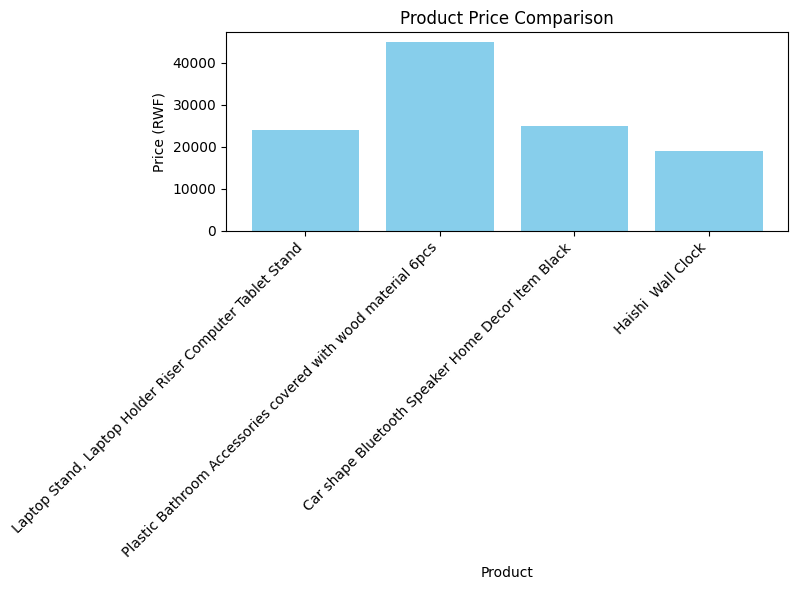

In [ ]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import matplotlib.pyplot as plt
from IPython.display import display


def scrape_murukali_product(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    print(f"Fetching data from: {url}")
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error accessing the website: {e}")
        return None

    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the JSON script containing product data
    script_tag = soup.find("script", {"type": "application/json", "data-section-type": "static-product"})

    if not script_tag:
        print("Product data not found in JSON format.")
        return None

    # Load JSON data
    try:
        product_data = json.loads(script_tag.string)
        product_info = product_data["product"]

        # Extract product details
        name = product_info.get("title", "Name not found")
        price = product_info.get("price", "Price not found")
        description = BeautifulSoup(product_info.get("description", ""), "html.parser").text.strip()
        image_url = urljoin(url, product_info["featured_image"]) if "featured_image" in product_info else "Image not found"

        # Convert price to numeric format
        price = float(price) / 100 if isinstance(price, int) else "Price not found"

        product = {
            "name": name,
            "price": price,
            "description": description,
            "image_url": image_url,
            "link": url
        }

        print("Successfully scraped product data.")
        return product

    except json.JSONDecodeError:
        print("Error decoding JSON data.")
        return None


# Product URLs
product_urls = [
    "https://murukali.com/products/laptop-stand-laptop-holder-riser-computer-tablet-stand",
    "https://murukali.com/products/usb-c-hub-adapter",
    "https://murukali.com/products/wireless-keyboard",
    "https://murukali.com/products/ergonomic-office-chair",
    "https://murukali.com/products/plastic-bathroom-accessories-covered-with-wood-material-6pcs",
    "https://murukali.com/products/car-shape-bluetooth-speaker-home-decor-item-black",
    "https://murukali.com/collections/all-products/products/haishi-wall-clock"
]

# Scrape products
products = []
for url in product_urls:
    product = scrape_murukali_product(url)
    if product:
        products.append(product)

# Create DataFrame
if products:
    df = pd.DataFrame(products)
    display(df)

    # Save to CSV
    df.to_csv("murukali_product_data.csv", index=False)
    print("Product data saved to murukali_product_data.csv")

    # Data analysis
    print("\nProduct Price Analysis")
    print(df.describe())

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.bar(df['name'], df['price'], color='skyblue')
    plt.xlabel('Product')
    plt.ylabel('Price (RWF)')
    plt.title('Product Price Comparison')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No product data collected.")
